<a href="https://colab.research.google.com/github/PerlaLunaD/analisis-salarial-por-industria/blob/main/An%C3%A1lisis__Salarial__por__Industria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. El problema del negocio

Como afecta el grado academico y la especializacion al salario en diferenrtes tipos de trabajo dentro de una industria en especifico.

### 2. Importando librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 3. Carga y exploracion de datos (una primer mirada al dataset)

In [3]:
data = pd.read_csv ('/content/train_features.csv')

In [4]:
print(data.shape)

(195800, 10)


In [5]:
data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Unnamed: 8,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38.0,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8.0,17.0,NaN,142.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16.0,NaN,163.0


In [6]:
data.tail()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Unnamed: 8,salary
195795,JOB1362684603482,COMP50,CFO,MASTERS,PHYSICS,OIL,12.0,9.0,NaN,195.0
195796,JOB1362684603483,COMP11,JANITOR,HIGH_SCHOOL,NONE,AUTO,1.0,28.0,NaN,52.0
195797,JOB1362684603484,COMP25,JUNIOR,HIGH_SCHOOL,NONE,AUTO,6.0,81.0,NaN,66.0
195798,JOB1362684603485,COMP19,CEO,BACHELORS,BUSINESS,HEALTH,2.0,52.0,NaN,135.0
195799,JOB1362684603486,COMP32,MANAGER,HIGH_,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.count()

,0
jobId,195800
companyId,195800
jobType,195800
degree,195800
major,195799
industry,195799
yearsExperience,195799
milesFromMetropolis,195799
Unnamed: 8,0
salary,195799


### 3. Limpieza

In [8]:
cols =['jobId','companyId','jobType','degree','major','industry','yearsExperience','milesFromMetropolis', 'Unnamed: 8', 'salary']

df = data[cols]

In [9]:
df = data[cols]

In [10]:
df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Unnamed: 8,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38.0,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8.0,17.0,NaN,142.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16.0,NaN,163.0
...,...,...,...,...,...,...,...,...,...,...
195795,JOB1362684603482,COMP50,CFO,MASTERS,PHYSICS,OIL,12.0,9.0,NaN,195.0
195796,JOB1362684603483,COMP11,JANITOR,HIGH_SCHOOL,NONE,AUTO,1.0,28.0,NaN,52.0
195797,JOB1362684603484,COMP25,JUNIOR,HIGH_SCHOOL,NONE,AUTO,6.0,81.0,NaN,66.0
195798,JOB1362684603485,COMP19,CEO,BACHELORS,BUSINESS,HEALTH,2.0,52.0,NaN,135.0


In [11]:
df.rename(columns={'jobId':'Id'},inplace=True)
df.rename(columns={'companyId':'CompanyId'},inplace=True)
df.rename(columns={'jobType':'JobType'},inplace=True)
df.rename(columns={'yearsExperience	':'YearsExperience	'},inplace=True)
df.rename(columns={'milesFromMetropolis':'MilesFromMetropolis'},inplace=True)
df.rename(columns={'Unnamed: 8':'Unnamed'},inplace=True)
#se modifico el nombre de los emcabezados

In [12]:
df

,Id,CompanyId,JobType,degree,major,industry,yearsExperience,MilesFromMetropolis,Unnamed,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38.0,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8.0,17.0,NaN,142.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16.0,NaN,163.0
...,...,...,...,...,...,...,...,...,...,...
195795,JOB1362684603482,COMP50,CFO,MASTERS,PHYSICS,OIL,12.0,9.0,NaN,195.0
195796,JOB1362684603483,COMP11,JANITOR,HIGH_SCHOOL,NONE,AUTO,1.0,28.0,NaN,52.0
195797,JOB1362684603484,COMP25,JUNIOR,HIGH_SCHOOL,NONE,AUTO,6.0,81.0,NaN,66.0
195798,JOB1362684603485,COMP19,CEO,BACHELORS,BUSINESS,HEALTH,2.0,52.0,NaN,135.0


In [13]:
df['yearsExperience'].unique()

array([10.,  3.,  8.,  2., 23.,  9.,  1., 17., 24.,  7., 21., 13., 11.,
       14., 18., 20., 12., 15., 22.,  0., 19.,  5.,  4., 16.,  6., nan])

In [14]:
df.drop_duplicates(inplace=True)  # Elimina filas duplicadas

In [15]:
len(df)

195800

In [16]:
df1 = df.copy()

In [17]:
df1

,Id,CompanyId,JobType,degree,major,industry,yearsExperience,MilesFromMetropolis,Unnamed,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38.0,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8.0,17.0,NaN,142.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16.0,NaN,163.0
...,...,...,...,...,...,...,...,...,...,...
195795,JOB1362684603482,COMP50,CFO,MASTERS,PHYSICS,OIL,12.0,9.0,NaN,195.0
195796,JOB1362684603483,COMP11,JANITOR,HIGH_SCHOOL,NONE,AUTO,1.0,28.0,NaN,52.0
195797,JOB1362684603484,COMP25,JUNIOR,HIGH_SCHOOL,NONE,AUTO,6.0,81.0,NaN,66.0
195798,JOB1362684603485,COMP19,CEO,BACHELORS,BUSINESS,HEALTH,2.0,52.0,NaN,135.0


In [18]:
mediana = df1['yearsExperience'].median()
mediana

12.0

In [19]:
df1['yearsExperience'] = df1['yearsExperience'].fillna(mediana)

In [20]:
df1

,Id,CompanyId,JobType,degree,major,industry,yearsExperience,MilesFromMetropolis,Unnamed,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38.0,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8.0,17.0,NaN,142.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16.0,NaN,163.0
...,...,...,...,...,...,...,...,...,...,...
195795,JOB1362684603482,COMP50,CFO,MASTERS,PHYSICS,OIL,12.0,9.0,NaN,195.0
195796,JOB1362684603483,COMP11,JANITOR,HIGH_SCHOOL,NONE,AUTO,1.0,28.0,NaN,52.0
195797,JOB1362684603484,COMP25,JUNIOR,HIGH_SCHOOL,NONE,AUTO,6.0,81.0,NaN,66.0
195798,JOB1362684603485,COMP19,CEO,BACHELORS,BUSINESS,HEALTH,2.0,52.0,NaN,135.0


In [21]:
mediana = df1['salary'].median()
mediana

114.0

In [22]:
df1['salary'] = df1['salary'].fillna(mediana)

In [23]:
df1

,Id,CompanyId,JobType,degree,major,industry,yearsExperience,MilesFromMetropolis,Unnamed,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38.0,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8.0,17.0,NaN,142.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16.0,NaN,163.0
...,...,...,...,...,...,...,...,...,...,...
195795,JOB1362684603482,COMP50,CFO,MASTERS,PHYSICS,OIL,12.0,9.0,NaN,195.0
195796,JOB1362684603483,COMP11,JANITOR,HIGH_SCHOOL,NONE,AUTO,1.0,28.0,NaN,52.0
195797,JOB1362684603484,COMP25,JUNIOR,HIGH_SCHOOL,NONE,AUTO,6.0,81.0,NaN,66.0
195798,JOB1362684603485,COMP19,CEO,BACHELORS,BUSINESS,HEALTH,2.0,52.0,NaN,135.0


In [24]:
# Eliminar la fila con el índice 'unmade'
df1 = df1.drop('Unnamed', axis=1)

In [25]:
df1

,Id,CompanyId,JobType,degree,major,industry,yearsExperience,MilesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38.0,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8.0,17.0,142.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16.0,163.0
...,...,...,...,...,...,...,...,...,...
195795,JOB1362684603482,COMP50,CFO,MASTERS,PHYSICS,OIL,12.0,9.0,195.0
195796,JOB1362684603483,COMP11,JANITOR,HIGH_SCHOOL,NONE,AUTO,1.0,28.0,52.0
195797,JOB1362684603484,COMP25,JUNIOR,HIGH_SCHOOL,NONE,AUTO,6.0,81.0,66.0
195798,JOB1362684603485,COMP19,CEO,BACHELORS,BUSINESS,HEALTH,2.0,52.0,135.0


In [26]:
# Seleccionar la columna de salarios
columna_salarios = 'salary'

# Calcular el IQR
Q1 = df1[columna_salarios].quantile(0.25)
Q3 = df1[columna_salarios].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df1[(df1[columna_salarios] < limite_inferior) | (df1[columna_salarios] > limite_superior)]

# Mostrar los outliers
print(outliers)

                      Id CompanyId         JobType       degree       major  \
266     JOB1362684407953    COMP30             CEO      MASTERS     BIOLOGY   
362     JOB1362684408049    COMP38             CTO      MASTERS        NONE   
560     JOB1362684408247    COMP53             CEO      MASTERS     BIOLOGY   
670     JOB1362684408357    COMP26             CEO      MASTERS        MATH   
719     JOB1362684408406    COMP54  VICE_PRESIDENT     DOCTORAL     BIOLOGY   
...                  ...       ...             ...          ...         ...   
195330  JOB1362684603017    COMP46             CEO      MASTERS        MATH   
195499  JOB1362684603186    COMP21             CEO    BACHELORS   CHEMISTRY   
195545  JOB1362684603232    COMP31  VICE_PRESIDENT     DOCTORAL   CHEMISTRY   
195586  JOB1362684603273     COMP8             CEO  HIGH_SCHOOL        NONE   
195762  JOB1362684603449    COMP39             CTO    BACHELORS  LITERATURE   

       industry  yearsExperience  MilesFromMetropol

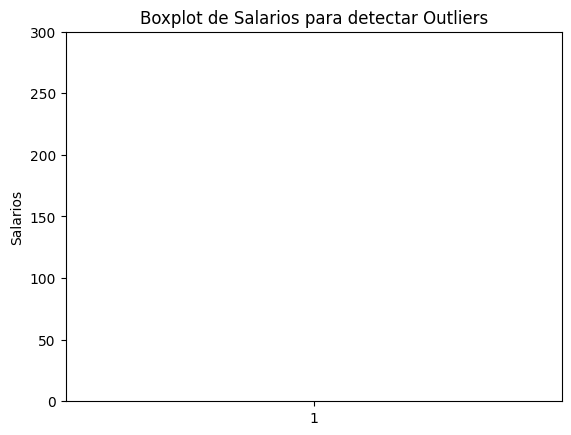

In [27]:

plt.boxplot(df[columna_salarios])
plt.title('Boxplot de Salarios para detectar Outliers')
plt.ylabel('Salarios')
plt.ylim(0, 300)
plt.show()